### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Flatten,BatchNormalization
from keras import optimizers


Using TensorFlow backend.


In [2]:
tf.__version__

'1.13.1'

### Collect Data

In [3]:
import keras

In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [5]:
trainX.shape,trainY.shape,testX.shape,testY.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [7]:
trainY=tf.keras.utils.to_categorical(trainY,10)
testY=tf.keras.utils.to_categorical(testY,10)

In [9]:
# trainY = trainY.reshape(trainY.shape[0], w, h, 1)
# testY = testY.reshape(testY.shape[0], w, h, 1)

In [10]:
print('First 5 examples now are: ', trainY[0:5])

First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

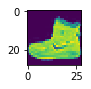

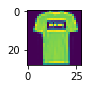

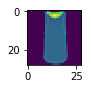

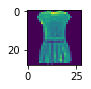

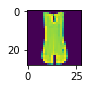

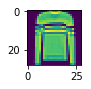

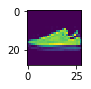

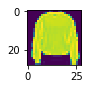

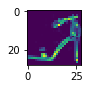

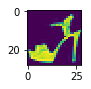

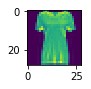

In [11]:
for i in range(11):
    plt.figure(i,figsize=(1,1))
    plt.imshow(trainX[i])

In [12]:
w, h = 28, 28

trainX = trainX.reshape(trainX.shape[0], w, h, 1)
testX = testX.reshape(testX.shape[0], w, h, 1)

In [13]:
trainX.shape,trainY.shape

((60000, 28, 28, 1), (60000, 10))

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [17]:
model =Sequential()
model.add(Dense(10,init='uniform', activation='relu'))
model.add(Flatten())

model.add(Dense(10,init='uniform',))

model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(trainX,
         trainY,
         batch_size=64,
        )

C:\Users\Veni\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`
  
C:\Users\Veni\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="uniform")`
  """


Epoch 1/1
60000/60000 [==============================] - 11s 180us/step - loss: 2.8959 - acc: 1.0000e-04


In [23]:
score=model.evaluate(testX,testY,verbose=0)

In [24]:
score[1]

3.0000000447034835e-05

### Execute the model using model.fit()

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [28]:
model =Sequential()
model.add(BatchNormalization())
model.add(Dense(10,init='uniform', activation='relu'))
model.add(Flatten())

model.add(Dense(10,init='uniform',))

model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(trainX,
         trainY,
         batch_size=64,
         )

C:\Users\Veni\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Veni\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="uniform")`
  


Epoch 1/1
60000/60000 [==============================] - 25s 420us/step - loss: 2.3101 - acc: 0.7151


### Execute the model

In [33]:
score=model.evaluate(testX,testY,verbose=0)
score[1]

0.5400000095367432

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [35]:
model =Sequential()
model.add(BatchNormalization())
model.add(Dense(10,init='uniform', activation='relu'))
model.add(Flatten())

model.add(Dense(10,init='uniform',))
sgd=optimizers.SGD(lr=0.001)
model.compile(loss='binary_crossentropy',optimizer=sgd,metrics=['accuracy'])
model.fit(trainX,
     trainY,
     batch_size=64,
     )

C:\Users\Veni\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Veni\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="uniform")`
  


Epoch 1/1
60000/60000 [==============================] - 26s 427us/step - loss: 0.2837 - acc: 0.8998


In [36]:
score=model.evaluate(testX,testY,verbose=0)
score[1]

0.8999999761581421

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [38]:
model =Sequential()
model.add(BatchNormalization())
model.add(Dense(100,init='uniform', activation='sigmoid'))
model.add(Dense(100,init='uniform', activation='sigmoid'))
model.add(Dense(100,init='uniform', activation='sigmoid'))

model.add(Flatten())

model.add(Dense(10,init='uniform',activation='softmax'))
sgd=optimizers.SGD(lr=0.03)
model.compile(loss='binary_crossentropy',optimizer=sgd,metrics=['accuracy'])
model.fit(trainX,
     trainY,
     batch_size=64,
     )


C:\Users\Veni\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="sigmoid", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Veni\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\Veni\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="sigmoid", kernel_initializer="uniform")`
  """
C:\Users\Veni\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="uniform")`
  if __name__ == '__main__':


Epoch 1/1
60000/60000 [==============================] - 509s 8ms/step - loss: 2.8813 - acc: 0.8200


## Review model

In [39]:
scores=model.evaluate(testX,testY)

10000/10000 [==============================] - 22s 2ms/step


### Run the model

In [40]:
print(model.metrics_names[1],scores[1]*100)

acc 82.0000004196167
